# Dfsu - spectral data

MIKE 21 SW can output full spectral information in points, along lines or in an area. In all these cases data are stored in dfsu files with additional axes: frequency and directions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mikeio import Dfsu

In [2]:
def ReadAllStaticItems(filename):
    from mikecore.DfsFileFactory import DfsFileFactory
    dfs = DfsFileFactory.DfsGenericOpen(filename)
    static_items = {}
    for _ in range(20):
        try:
            si = dfs.ReadStaticItemNext()
            static_items[si.Name] = si.Data
        except:
            continue
    dfs.Close()
    return static_items

def ReadFrequenciesAndDirectionsFromSpectrumDfsu(filename):
    static_items = ReadAllStaticItems(filename)
    return static_items["Frequency"], static_items["Direction"]

## Read dfsu point spectrum

In [3]:
fn = "../tests/testdata/pt_spectra.dfsu"

In [4]:
f, dir = ReadFrequenciesAndDirectionsFromSpectrumDfsu(fn)
nf = len(f)
nd = len(dir)

In [5]:
dfs = Dfsu(fn)

In [6]:
# dfs._source.Frequency  # requires new version of MIKEcore

In [7]:
ds = dfs.read(time_steps=0)
ds[0] = ds[0].reshape(1,nd,nf)
spec = np.squeeze(ds[0])

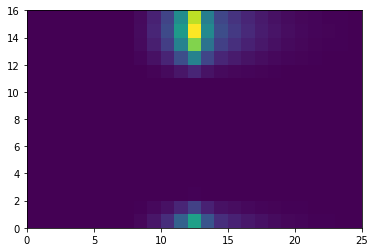

In [8]:
#plt.imshow(spec);
plt.pcolormesh(spec); # f,dir,

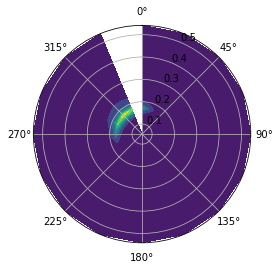

In [9]:
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
colorax = ax.contourf(dir, f, spec.T)

## Dfsu line spectrum

In [10]:
fn = "../tests/testdata/line_spectra.dfsu"

In [11]:
static_items = ReadAllStaticItems(fn)

In [12]:
f, dir = ReadFrequenciesAndDirectionsFromSpectrumDfsu(fn)
nf = len(f)
nd = len(dir)

In [13]:
static_items

{'Node id': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'X-coord': array([-1.57855106, -0.41955623,  0.73943861,  1.89843345,  3.05742828,
         4.21642312,  5.37541796,  6.5344128 ,  7.69340763,  8.85240247]),
 'Y-coord': array([49.87266744, 50.47872579, 51.08478413, 51.69084248, 52.29690083,
        52.90295917, 53.50901752, 54.11507586, 54.72113421, 55.32719256]),
 'Z-coord': array([ 1.00000002e-35,  1.00000002e-35,  1.00000002e-35, -3.91950912e+01,
        -3.27717552e+01, -2.67651939e+01, -1.22171335e+01, -3.52212219e+01,
        -2.17941895e+01,  1.00000002e-35], dtype=float32),
 'Code': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Element id': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'Element type': array([11, 11, 11, 11, 11, 11, 11, 11, 11]),
 'No of nodes': array([2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'Connectivity': array([ 1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9,
        10]),
 'Frequency': array([0.055     , 0.0605    , 0.06655   , 0.073205  , 0.0805255 ,

In [14]:
dfs = Dfsu(fn)
dfs

DfsuVerticalColumn
Number of elements: 9
Number of nodes: 10
Projection: LONG/LAT
Number of sigma layers: 0
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 4 steps with dt=6000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [15]:
ds = dfs.read(time_steps=0)  # will fail

ValueError: could not broadcast input array from shape (4000,) into shape (9,)

## Dfsu area spectrum

In [16]:
fn = "../tests/testdata/area_spectra.dfsu"

In [17]:
f, dir = ReadFrequenciesAndDirectionsFromSpectrumDfsu(fn)
nf = len(f)
nd = len(dir)

In [18]:
static_items = ReadAllStaticItems(fn)
static_items

{'Node id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107]),
 'X-coord': array([2.77319081, 2.94028455, 3.07360345, 2.82874172, 3.81829999,
        2.71210372, 2.47644266, 2.43240915, 1.85723266, 2.00398822,
        2.16154818, 2.21469128, 2.47735779, 2.52548943, 2.75606127,
        2.89044216, 3.0346319 , 3.25676474, 3.39151809, 2.63802458,
        3.0223315 , 2.42807634, 3.62486704, 3.12651719, 3.82738536,
        3.44081589, 3.8855218

In [19]:
dfs = Dfsu(fn)
dfs

Dfsu2D
Number of elements: 166
Number of nodes: 107
Projection: LONG/LAT
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 3 steps with dt=9000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00